## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Read data

In [2]:
data = pd.read_csv('ai_job_dataset.csv')

In [3]:
data

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics


In [4]:
data.isnull().sum()

,0
job_id,0
job_title,0
salary_usd,0
salary_currency,0
experience_level,0
employment_type,0
company_location,0
company_size,0
employee_residence,0
remote_ratio,0


## Data analysis and visualization

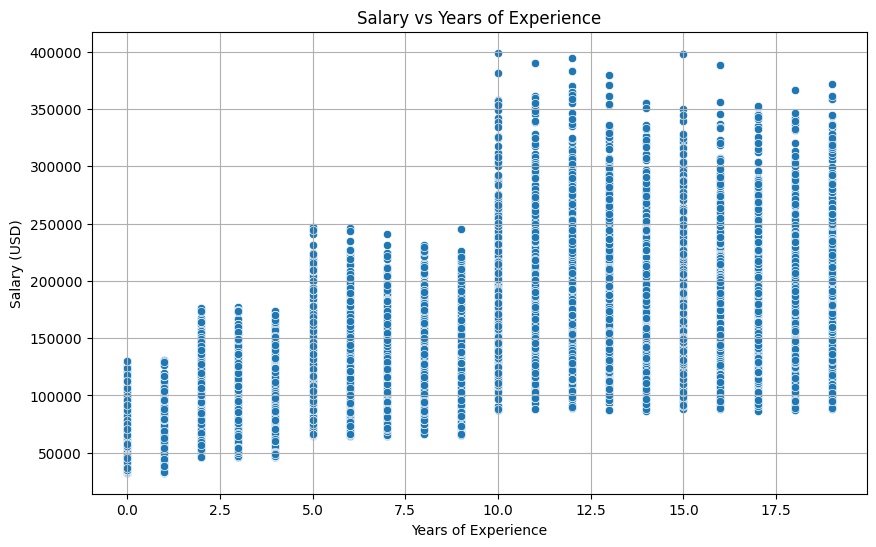

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='years_experience', y='salary_usd')
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (USD)')
plt.grid()
plt.show()

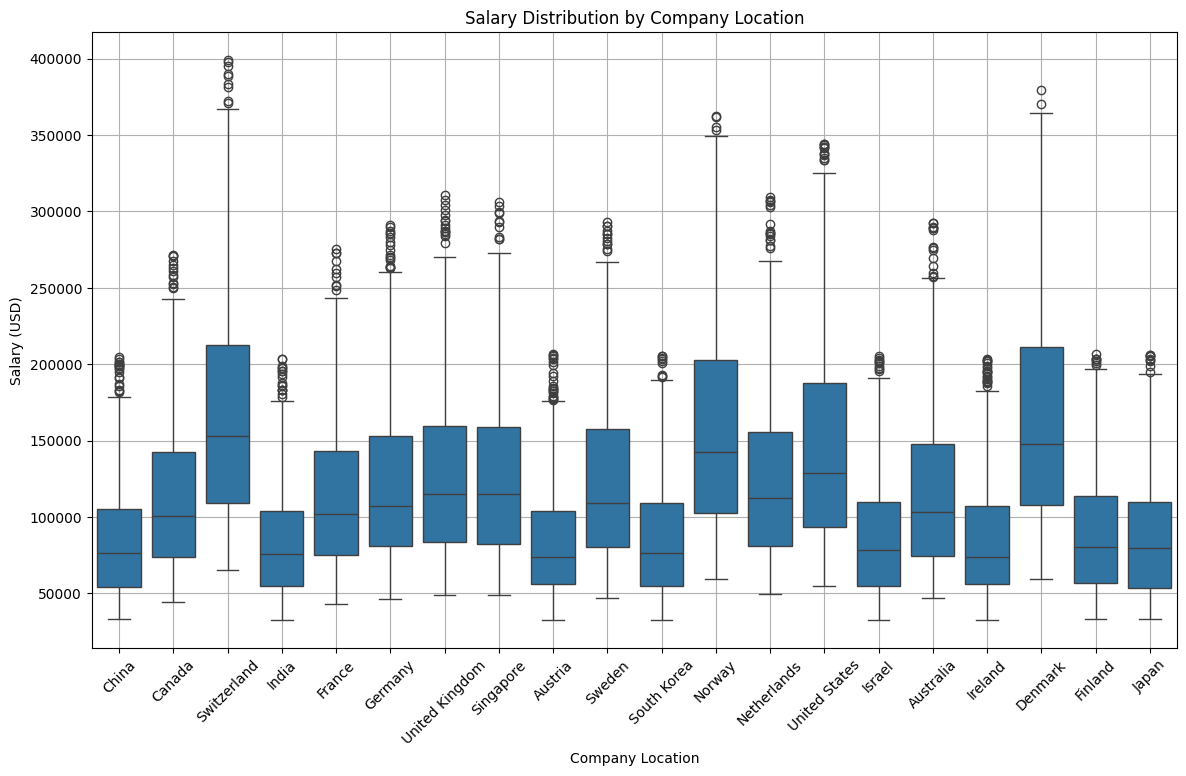

In [6]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='company_location', y='salary_usd')
plt.title('Salary Distribution by Company Location')
plt.xlabel('Company Location')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

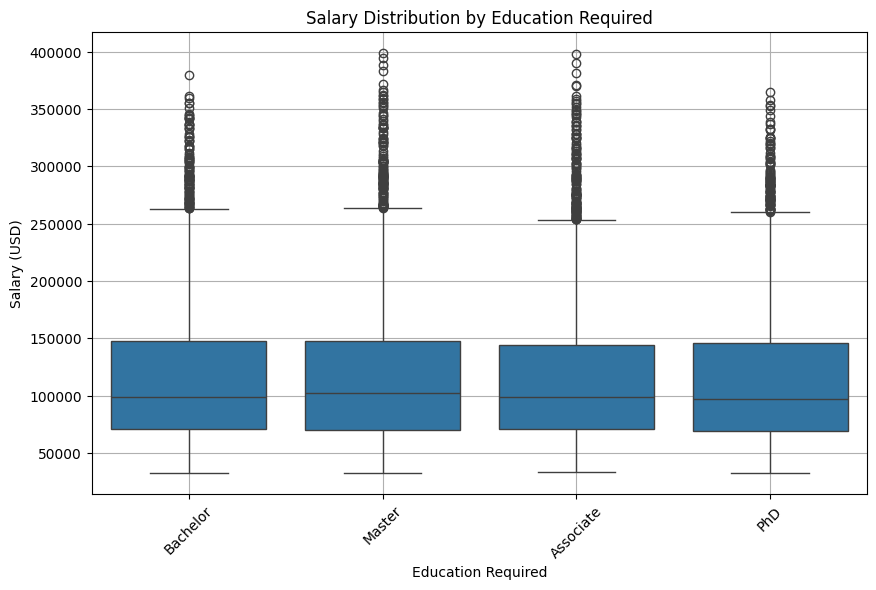

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='education_required', y='salary_usd')
plt.title('Salary Distribution by Education Required')
plt.xlabel('Education Required')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

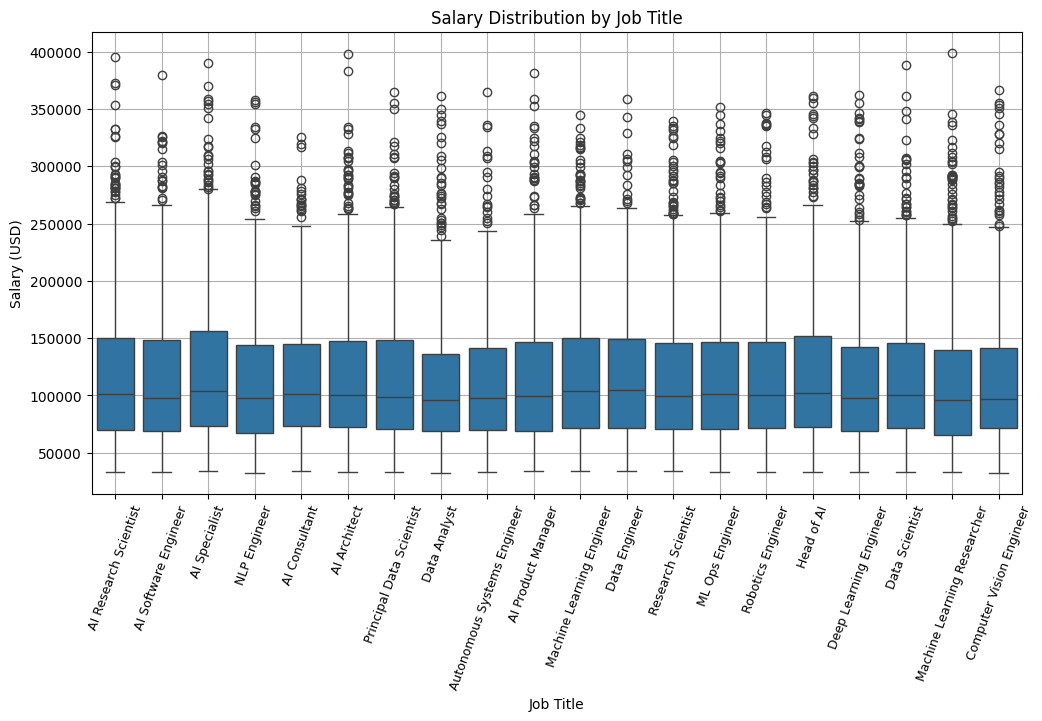

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='job_title', y='salary_usd')
plt.title('Salary Distribution by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=70, fontsize=9)
plt.grid()
plt.show()

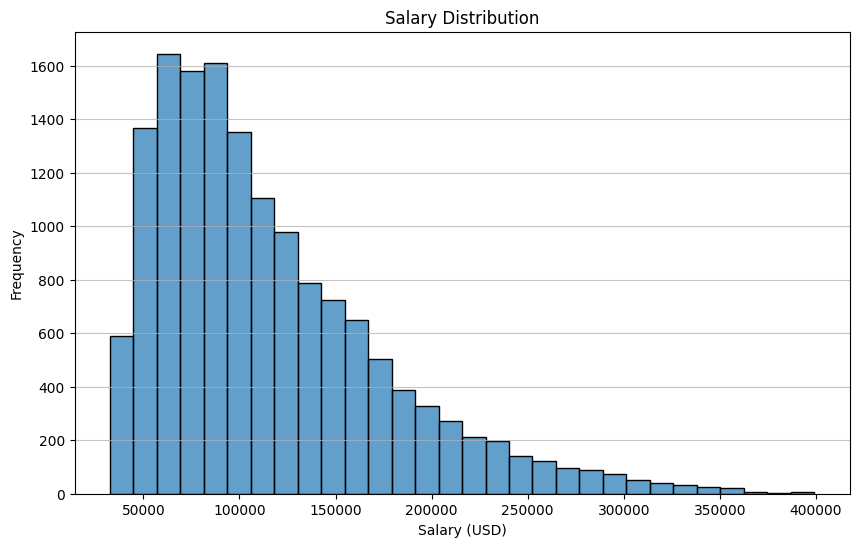

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data['salary_usd'], bins=30, alpha=0.7)
plt.title('Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Model Prediction and Evaluation

In [10]:
target_columns = ['job_title', 'experience_level', 'employment_type', 'company_location', 'company_size', 'employee_residence', 'remote_ratio', 'required_skills', 'education_required', 'years_experience', 'industry']
X = data[target_columns]
y = data['salary_usd']

X_encoded = pd.get_dummies(X)

X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.3, shuffle=True, random_state=44)

model = RandomForestRegressor(random_state=44)
model.fit(X_train, y_train)

importances = model.feature_importances_

feature_importance = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)



                                                 Feature  Importance
1                                       years_experience    0.323509
23                                   experience_level_EX    0.231415
47                          company_location_Switzerland    0.052949
25                                   experience_level_SE    0.043914
34                              company_location_Denmark    0.042122
...                                                  ...         ...
10980                 required_skills_SQL, R, Kubernetes    0.000000
10975  required_skills_SQL, R, GCP, Data Visualizatio...    0.000000
10974                 required_skills_SQL, R, GCP, Azure    0.000000
10973  required_skills_SQL, R, Deep Learning, Azure, ...    0.000000
4177   required_skills_Hadoop, NLP, Spark, Data Visua...    0.000000

[13755 rows x 2 columns]


## Conclusion

The analysis of the AI job market reveals several important findings regarding salary trends:

* Experience Matters: The data indicates that individuals with approximately 10 years of experience see a significant salary increase.


* Location Influence: The salary distribution by company location shows that Switzerland and Denmark offer notably higher salaries compared to other regions.

* Salary Range: The majority of salaries fall within the range of 50000 to 100000 USD.



The top five features impacting salary are:

1. Years of experience
2. Experience level (Executive)
3. Company location (Switzerland)
4. Experience level (Senior)
5. Company location (Denmark)
